### Getting shapemask using recursive division

In [1]:
import os;os.chdir('../')
from pyscissor import scissor
from netCDF4 import Dataset,num2date
import fiona, numpy as np
import pylab as pl
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from shapely.geometry import shape
from datetime import datetime as dt
%config InlineBackend.figure_format = 'svg'

In [2]:
sf = fiona.open('data/shape_2.geojson','r')
record = next(iter(sf))
shapely_shape = shape(record['geometry'])

In [3]:
def shifted_mesh(lons,lats):
    lats_diff = np.diff(lats,n=1)/2
    lats_s = lats-np.array([*lats_diff,lats_diff[-1]])
    lons_diff = np.diff(lons,n=1)/2
    lons_s = lons-np.array([*lons_diff,lons_diff[-1]])

    return np.meshgrid(lons_s,lats_s)

In [4]:
lats = np.arange(40.5,19.5,-1)
lons = np.arange(70.5,110.5)
pys  = scissor(shapely_shape,lats,lons)

In [5]:
wg_re = pys.get_masked_weight_recursive()

In [6]:
cart_ft = ShapelyFeature([shapely_shape],
                            ccrs.PlateCarree(),
                         facecolor='none',edgecolor='cyan',linewidth=2
                        )
mesh_grid = ShapelyFeature(Reader('data/mesh.geojson').geometries(),
                           ccrs.PlateCarree(),
                           facecolor='none',edgecolor='#661',linewidth=0.2
                          )

In [7]:
def shifted_mesh(lons,lats):
    lats_diff = np.diff(lats,n=1)/2
    lats_s = lats-np.array([*lats_diff,lats_diff[-1]])
    lons_diff = np.diff(lons,n=1)/2
    lons_s = lons-np.array([*lons_diff,lons_diff[-1]])

    return np.meshgrid(lons_s,lats_s)

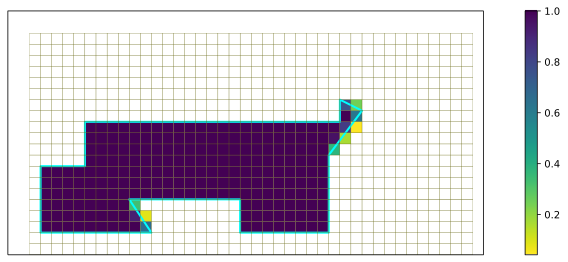

In [8]:
x,y = shifted_mesh(lons,lats)
pl.figure(figsize=(15,4.5))
ax=pl.axes(projection=ccrs.PlateCarree())
pl.pcolormesh(x,y,wg_re,cmap='viridis_r')
ax.add_feature(cart_ft)
ax.add_feature(mesh_grid)
pl.colorbar()